In [5]:
import requests
import uvicorn
import base64
from fastapi import FastAPI
from pydantic import BaseModel
import matplotlib.pyplot as plt
import numpy as np
import cv2
import json

app = FastAPI()

# encode image as base64 string
def encode_image(image):
    _, encoded_image = cv2.imencode(".jpg", image)
    return "data:image/jpeg;base64," + base64.b64encode(encoded_image).decode()

# decode base64 string to image
def decode_image(image_string):
    encoded_data = image_string.split(',')[1]
    nparr = np.frombuffer(base64.b64decode(encoded_data), np.uint8)
    return cv2.imdecode(nparr, cv2.IMREAD_COLOR)



image_file = 'putter.jpg'
url        = "http://localhost:8088"


# Load the image
image        = cv2.imread(image_file)
image        = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_string = encode_image(image)

payload = {
    "image": image_string,
    "name": "John",
    "surname": "Doe",
    "numbers": [1, 2, 3, 4, 5]
}
# response = requests.post(f"{url}/process-image")
response = requests.post(f"{url}/process-image", json=payload)

data = json.loads(response.content)
# print(data)

processed_image_string = data["processed_image"]
processed_image        = decode_image(processed_image_string)






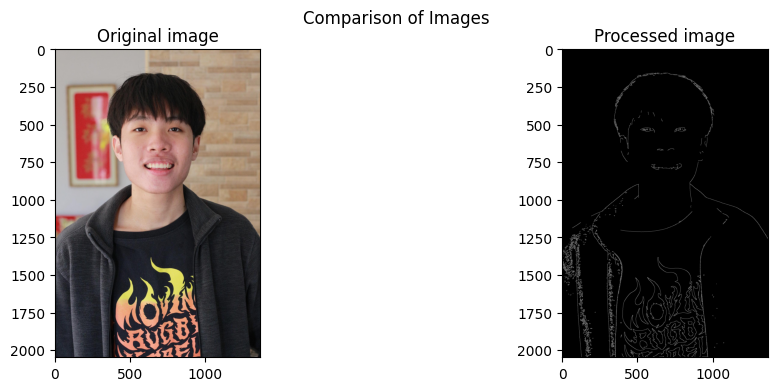

In [6]:

# Create a figure and set the title
fig = plt.figure(figsize=(12, 4))
fig.suptitle('Comparison of Images')

# Add the first image to the left subplot
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(image)
ax1.set_title('Original image')

# Add the second image to the right subplot
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(processed_image)
ax2.set_title('Processed image')

# Show the plot
plt.show()

<h1>Add Frontend</h1>

In [7]:
import os
from flask import Flask, render_template
import cv2

app = Flask(__name__,template_folder="")
def encode_image(image):
    _, encoded_image = cv2.imencode(".jpg", image)
    return "data:image/jpeg;base64," + base64.b64encode(encoded_image).decode()

# decode base64 string to image
def decode_image(image_string):
    encoded_data = image_string.split(',')[1]
    nparr = np.frombuffer(base64.b64decode(encoded_data), np.uint8)
    return cv2.imdecode(nparr, cv2.IMREAD_COLOR)


image_file = 'putter.jpg'
image_file2 = 'mind.jpg'
url        = "http://localhost:8088"

# Load the image
image        = cv2.imread(image_file)
imagefriend        = cv2.imread(image_file2)
image_string = encode_image(image)
image_stringfriend = encode_image(imagefriend)
payload = [{
    "image": image_string,
    "name": "puriwat",
    "surname": "udompittayasit",
    "numbers": [1, 2, 3, 4, 5]
},
{
    "image": image_stringfriend,
    "name": "mind",
    "surname": "tanavich",
    "numbers": [1, 2, 3, 4, 5]
}
]
response = requests.post(f"{url}/process-image", json=payload[0])
responsebuild = requests.post(f"{url}/process-image", json=payload[1])

data = json.loads(response.content)
data1 = json.loads(responsebuild.content)

processed_image_string = data["processed_image"]
processed_image        = decode_image(processed_image_string)

@app.route('/')
def template():
    return render_template("index.html", mypicture=image_string, friendpicture=image_stringfriend, name=data, name2=data1)    

if __name__ == '__main__':
    app.run(host="0.0.0.0",port="8001")


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8001
 * Running on http://192.168.1.33:8001
Press CTRL+C to quit
127.0.0.1 - - [26/Mar/2023 23:26:14] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [26/Mar/2023 23:26:15] "GET /favicon.ico HTTP/1.1" 404 -
